In [ ]:
import pandas as pd
import matplotlib as mpl
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree



##The Solar Flares Dataset was edited before being uploaded to the Google Colab.
##The editing included the refactoring of column headers since they were either
##hard to understand or misspelled or impossible to call due to white space
dataset = pd.read_excel("/content/Solar_Flares_Dataset.xlsx") ##Reads the Solar Flares dataset
print(dataset["Modified Zurich Class"]) ##'modified Zurich class'

##Number of tests will determine how many times each algorithm is run.
num_of_tests = 100

0       H
1       D
2       C
3       H
4       H
       ..
1061    H
1062    H
1063    C
1064    H
1065    B
Name: Modified Zurich Class, Length: 1066, dtype: object


In [ ]:
##Defining the Functions for tests - Random Forest
def RandomForestTest(X_train, y_train, X_test, y_test):
  ##Sum value of the error rate
  sum_error = 0
  sum_of_score = 0
  sum_oob = 0

  for i in list(range(num_of_tests)):
    rf_Model = RandomForestClassifier(oob_score=True)


    rf_Model.fit(X_train,  y_train)
    rf_y_predict = rf_Model.predict(X_test)

    rf_mse = mean_squared_error(y_pred=rf_y_predict, y_true=y_test)

    sum_error += rf_mse
    sum_oob += rf_Model.oob_score_
    sum_of_score += rf_Model.score(X_test, y_test)

  print("OOB Score: " + str(sum_oob/num_of_tests))
  print('Random Forest Mean Squared Error Rate: ' + str(sum_error/num_of_tests))
  print('Random Forest Model Prediction Score: ' + str(sum_of_score/num_of_tests))


In [ ]:
##Defining the Functions for tests - Linear Regression
def LinearRegressionTest(X_train, y_train, X_test, y_test):
  ##Sum value of the error rate
  sum_error = 0
  sum_of_score = 0

  for i in list(range(num_of_tests)):
    lr_Model = LinearRegression()

    lr_Model.fit(X_train, y_train)
    lr_y_predict = lr_Model.predict(X_test)

    lr_mse = mean_squared_error(y_pred=lr_y_predict, y_true=y_test)

    sum_error += lr_mse
    sum_of_score += lr_Model.score(X_test, y_test)

  print('Linear Regression Mean Squared Error Rate: ' + str(sum_error/num_of_tests))
  print('Linear Regression Model Prediction Score: ' + str(sum_of_score/num_of_tests))

In [ ]:
##Defining the Functions for tests - Logistic Regression
def LogisticRegressionTest(X_train, y_train, X_test, y_test):
  ##Sum value of the error rate
  sum_error = 0
  sum_of_score = 0

  for i in list(range(num_of_tests)):

    logr_Model = LogisticRegression(multi_class='auto', max_iter=1000)
    logr_Model.fit(X_train, y_train)
    logr_y_predict = logr_Model.predict(X_test)

    logr_mse = mean_squared_error(y_pred=logr_y_predict, y_true=y_test)

    sum_error += logr_mse
    sum_of_score += logr_Model.score(X_test, y_test)

  print('Logistic Regression Mean Squared Error Rate: ' + str(sum_error/num_of_tests))
  print('Logistic Regression Model Prediction Score: ' + str(sum_of_score/num_of_tests))

In [ ]:
##Defining the Functions for tests - Decision Tree Classifier
def DecisionTreeTest(X_train, y_train, X_test, y_test):
  ##Sum value of the error rate
  sum_error = 0
  sum_of_score = 0

  for i in list(range(num_of_tests)):

    dtc = tree.DecisionTreeClassifier(max_depth = 6)
    dtc = dtc.fit(X_train, y_train)
    dtc_y_predict = dtc.predict(X_test)

    dtc_y_proba = dtc.predict_proba(X_test)

    dtc_mse = mean_squared_error(y_pred=dtc_y_predict, y_true=y_test)

    sum_error += dtc_mse
    sum_of_score += dtc.score(X_test, y_test)

  print('Decision Tree Mean Squared Error Rate: ' + str(sum_error/num_of_tests))
  print('Decision Tree Model Prediction Score: ' + str(sum_of_score/num_of_tests))

In [ ]:
##Defining the Functions for tests - Linear SVC
def LinearSVCTest(X_train, y_train, X_test, y_test):
  ##Sum value of the error rate
  sum_error = 0
  sum_of_score = 0

  for i in list(range(num_of_tests)):
    lsvc_Model = svm.SVC()

    lsvc_Model.fit(X_train, y_train)
    lsvc_y_predict = lsvc_Model.predict(X_test)

    lr_mse = mean_squared_error(y_pred=lsvc_y_predict, y_true=y_test)

    sum_error += lr_mse
    sum_of_score += lsvc_Model.score(X_test, y_test)

  print('Linear SVC Mean Squared Error Rate: ' + str(sum_error/num_of_tests))
  print('Linear SVC Model Prediction Score: ' + str(sum_of_score/num_of_tests))

In [ ]:
dataset_cp = dataset.copy(deep = True) ##Copy the dataset
print(dataset_cp.loc[:,'Largest Spot Size'].unique()) 

###These columns get commented out during some testing phases to see the impact
###They cause on the outcome of predictions
"""
dataset_cp = dataset_cp.drop(['Modified Zurich Class'], axis = 1)
dataset_cp = dataset_cp.drop(['Largest Spot Size'], axis = 1)
dataset_cp = dataset_cp.drop(['Spot Distribution'], axis = 1)
dataset_cp = dataset_cp.drop(['Evolution'], axis = 1)
dataset_cp = dataset_cp.drop(['Region Complexity Change'], axis = 1)
"""

###Dataset for testing M-Class Flares without X-Class flares or C-Class flares
###This would get commented out when those columns were needed.
dataset_cp_M = dataset_cp.drop(['X-Class Flares', 'C-Class Flares'], axis = 1)

['A' 'R' 'S' 'X' 'K' 'H']


In [ ]:

###If the data was dropped in the previous block of code than some lines of code
###Would need to be commented out.
def getDataSet(data):
  ##Reformating Categorical values to Numerical values for Modified Zurich Class
  ### B = 0, C = 1, D = 2, E = 3, F = 4, H = 5
  new_dataset = data
  
  new_dataset['Modified Zurich Class'] = new_dataset['Modified Zurich Class'].replace('B', 0)
  new_dataset['Modified Zurich Class'] = new_dataset['Modified Zurich Class'].replace('C', 1)
  new_dataset['Modified Zurich Class'] = new_dataset['Modified Zurich Class'].replace('D', 2)
  new_dataset['Modified Zurich Class'] = new_dataset['Modified Zurich Class'].replace('E', 3)
  new_dataset['Modified Zurich Class'] = new_dataset['Modified Zurich Class'].replace('F', 4)
  new_dataset['Modified Zurich Class'] = new_dataset['Modified Zurich Class'].replace('H', 5)

  ##Reformating Categorical values to Numerical values for Largest Spot Size
  ### A = 0, H = 1, K = 2, R = 3, S = 4, X = 5
  new_dataset['Largest Spot Size'] = new_dataset['Largest Spot Size'].replace('A', 0)
  new_dataset['Largest Spot Size'] = new_dataset['Largest Spot Size'].replace('H', 1)
  new_dataset['Largest Spot Size'] = new_dataset['Largest Spot Size'].replace('K', 2)
  new_dataset['Largest Spot Size'] = new_dataset['Largest Spot Size'].replace('R', 3)
  new_dataset['Largest Spot Size'] = new_dataset['Largest Spot Size'].replace('S', 4)
  new_dataset['Largest Spot Size'] = new_dataset['Largest Spot Size'].replace('X', 5)

  ##Reformating Categorical values to Numerical values for Spot Distribution
  ### O = 0, I = 1, C = 2, X = 3
  new_dataset['Spot Distribution'] = new_dataset['Spot Distribution'].replace('O', 0)
  new_dataset['Spot Distribution'] = new_dataset['Spot Distribution'].replace('I', 1)
  new_dataset['Spot Distribution'] = new_dataset['Spot Distribution'].replace('C', 2)
  new_dataset['Spot Distribution'] = new_dataset['Spot Distribution'].replace('X', 3)
  

  ##Reformating Categorical values to Numerical values for Area of Spot
  ###A = 0, H = 1, K = 2, R = 3, S = 4, X = 5
  new_dataset['Area of Spot'] = new_dataset['Area of Spot'].replace('A', 0)
  new_dataset['Area of Spot'] = new_dataset['Area of Spot'].replace('H', 1)
  new_dataset['Area of Spot'] = new_dataset['Area of Spot'].replace('K', 2)
  new_dataset['Area of Spot'] = new_dataset['Area of Spot'].replace('R', 3)
  new_dataset['Area of Spot'] = new_dataset['Area of Spot'].replace('S', 4)
  new_dataset['Area of Spot'] = new_dataset['Area of Spot'].replace('X', 5)

  
  return new_dataset

dataset_M = getDataSet(dataset_cp) ##Sets the copy of the dataset into dataset_M


In [ ]:
y_M = dataset_M['M-Class Flares']

##Dropping values from specific flare values for predictions
X_M = dataset_M.drop(['M-Class Flares'], axis = 1)

##Outputs the number of rows and columns
print(f'X_M: {X_M.shape}')

X_M: (1066, 12)


In [ ]:
##Predicting M-Class Flares
X_M_train, X_M_test, y_M_train, y_M_test = train_test_split(X_M, y_M, test_size=0.1)

y_M_test.head()

dataset_M['X-Class Flares'].value_counts() ##Counts the occurence of X-Class flares

0    1061
1       4
2       1
Name: X-Class Flares, dtype: int64

In [ ]:
X_M_test.head()

,Modified Zurich Class,Largest Spot Size,Spot Distribution,Activity,Evolution,24 Hour Activity,Historical Complexity,Region Complexity Change,Area,Area of Spot,C-Class Flares,X-Class Flares
428,1,3,0,1,3,1,1,2,1,1,0,0
554,0,5,0,1,3,1,1,2,1,1,0,0
835,5,4,3,1,3,1,1,1,1,1,2,0
1007,1,4,0,1,3,1,1,2,1,1,0,0
858,1,4,0,1,3,1,1,2,1,1,0,0


In [ ]:
print("M-Class Flare Results: ")
LinearSVCTest(X_M_train, y_M_train, X_M_test, y_M_test) ##M Class test

M-Class Flare Results: 
Linear SVC Mean Squared Error Rate: 0.04672897196261687
Linear SVC Model Prediction Score: 0.9813084112149538


In [ ]:
print("M-Class Flare Results: ")
RandomForestTest(X_M_train, y_M_train, X_M_test, y_M_test) ##M Class test

M-Class Flare Results: 
OOB Score: 0.959509906152242
Random Forest Mean Squared Error Rate: 0.043457943925233666
Random Forest Model Prediction Score: 0.984579439252336


In [ ]:
print("M-Class Flare Results: ")
LinearRegressionTest(X_M_train, y_M_train, X_M_test, y_M_test)

M-Class Flare Results: 
Linear Regression Mean Squared Error Rate: 0.03807158627711796
Linear Regression Model Prediction Score: 0.1713277732191559


In [ ]:
print("M-Class Flare Results: ")
LogisticRegressionTest(X_M_train, y_M_train, X_M_test, y_M_test)

M-Class Flare Results: 
Logistic Regression Mean Squared Error Rate: 0.04672897196261687
Logistic Regression Model Prediction Score: 0.9813084112149538


In [ ]:
print("M-Class Flare Results: ")
DecisionTreeTest(X_M_train, y_M_train, X_M_test, y_M_test)

M-Class Flare Results: 
Decision Tree Mean Squared Error Rate: 0.056074766355140054
Decision Tree Model Prediction Score: 0.9719626168224282


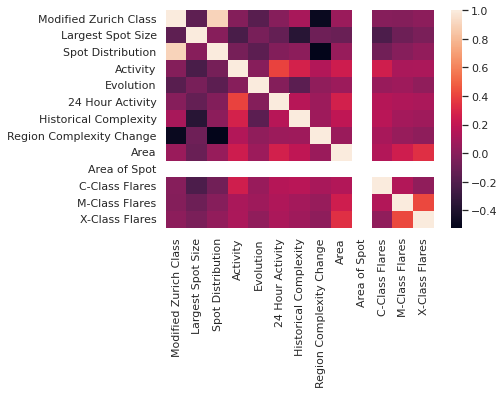

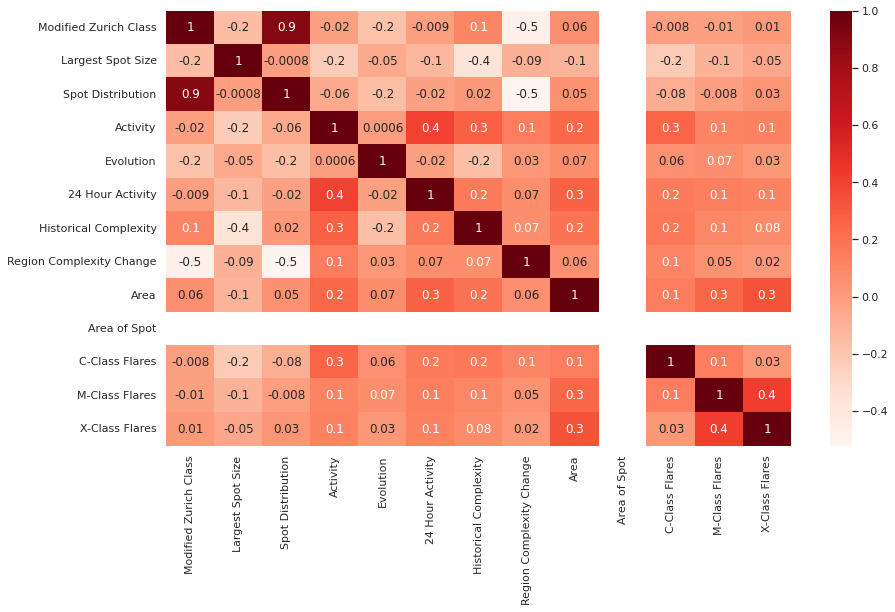

In [ ]:
import seaborn as sns
sns.heatmap(dataset_M.corr())

mpl.pyplot.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = dataset_M.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Reds", fmt='0.1g')